In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_1 = pd.read_csv('BTC-USD 2021.csv')

In [5]:
data = pd.read_csv('data_for_stat.csv')

In [6]:
data_1.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace = True)

In [8]:
data.drop(['Log', 'Diff_1', 'Detrended_9', 'Detrended_10', 'Detrended', 'Log_Diff'], axis = 1, inplace = True)

In [9]:
data

,Date,Open
0,2017-01-01,963.658020
1,2017-01-02,998.617004
2,2017-01-03,1021.599976
3,2017-01-04,1044.400024
4,2017-01-05,1156.729980
...,...,...
1643,2021-07-02,33549.600177
1644,2021-07-03,33854.421362
1645,2021-07-04,34665.564866
1646,2021-07-05,35284.344430


In [21]:
data['Date'] = pd.to_datetime(data['Date'])
data_1['Date'] = pd.to_datetime(data_1['Date'])

<ipython-input-21-1a72a8b5b870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 1 to 1647
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1647 non-null   datetime64[ns]
 1   Open          1647 non-null   float64       
 2   Diff_1        1647 non-null   float64       
 3   Detrended     1647 non-null   float64       
 4   Detrended_9   1647 non-null   float64       
 5   Detrended_10  1647 non-null   float64       
 6   Log           1647 non-null   float64       
 7   Log_Diff      1647 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 103.1 KB


In [23]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   Open    366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


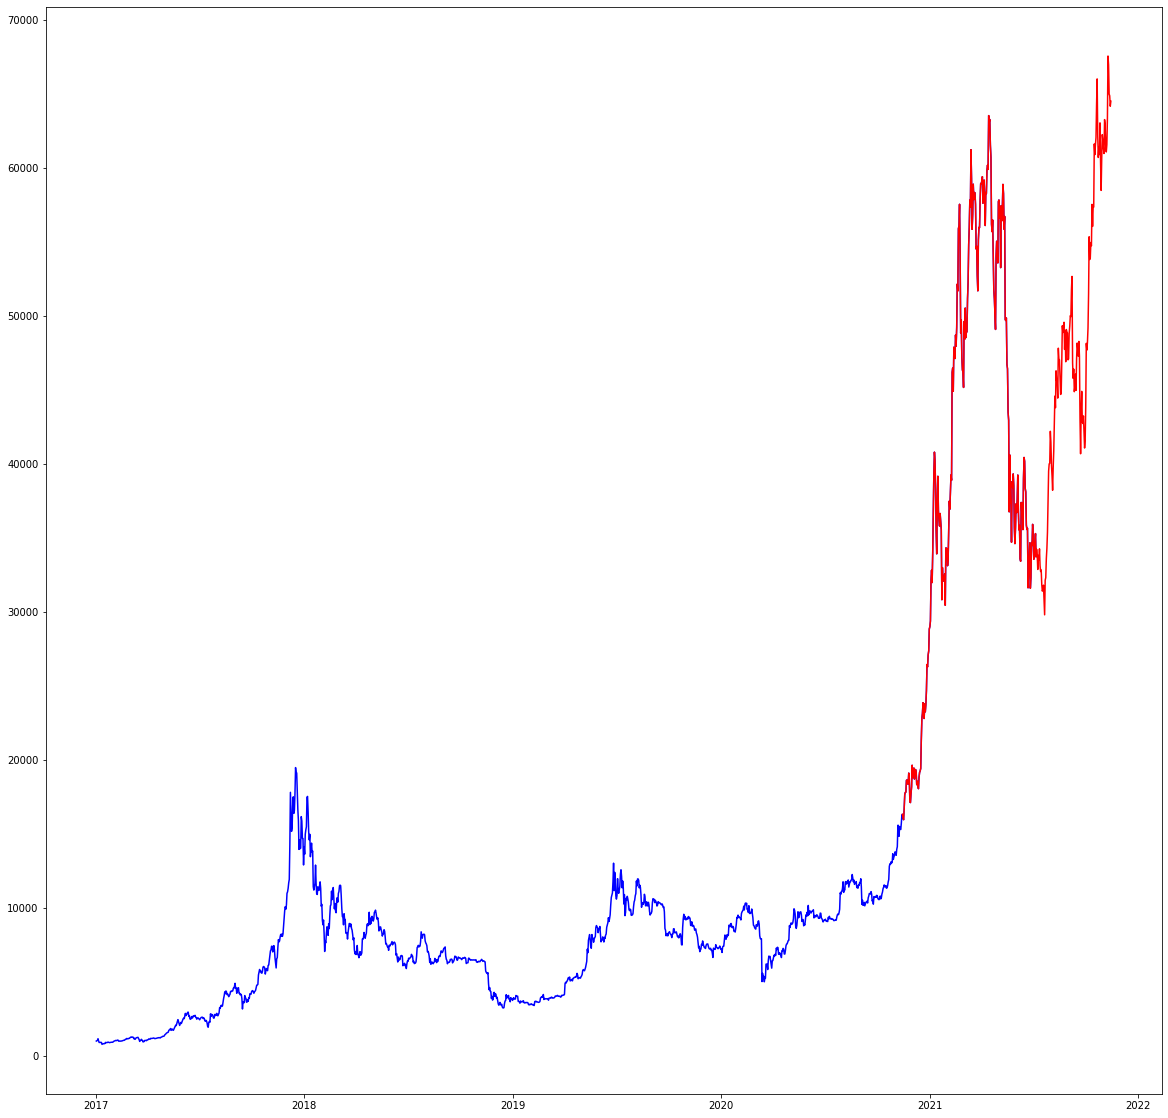

In [27]:
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(data['Date'], data['Open'], color = 'b')
plt.plot(data_1['Date'], data_1['Open'], color = 'r')

In [28]:
data.set_index('Date', inplace = True)
data_1.set_index('Date', inplace = True)

In [33]:
import numpy as np
dataset['Log'] = np.log(dataset['Open'])
dataset['Log_Diff'] = dataset['Log'] - dataset['Log'].shift(1)

In [ ]:
data_1.drop('Log', axis = 1, inplace = True)
data.drop(['Log', 'Diff_1', 'Detrended_9', 'Detrended_10', 'Detrended'], axis = 1, inplace = True)

In [45]:
data_1 = data_1[1:]

In [27]:
dataset = pd.concat([data, data_1], axis = 0)

In [12]:
dataset.drop_duplicates(inplace = True)

In [32]:
dataset['Date'].unique().shape

(1779,)

In [31]:
dataset.shape

(1779, 2)

In [35]:
dataset = dataset[1:]

In [37]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace = True)

<ipython-input-37-8a65f8aadede>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Date'] = pd.to_datetime(dataset['Date'])


In [38]:
dataset.to_csv('data_for_predictions.csv')

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1778 entries, 2017-01-02 to 2021-11-14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      1778 non-null   float64
 1   Log       1778 non-null   float64
 2   Log_Diff  1778 non-null   float64
dtypes: float64(3)
memory usage: 55.6 KB


### Будуємо графік функції і дивимось на перший погляд чи є сезонність і яка вона (адитивна чи мультиплікативна)

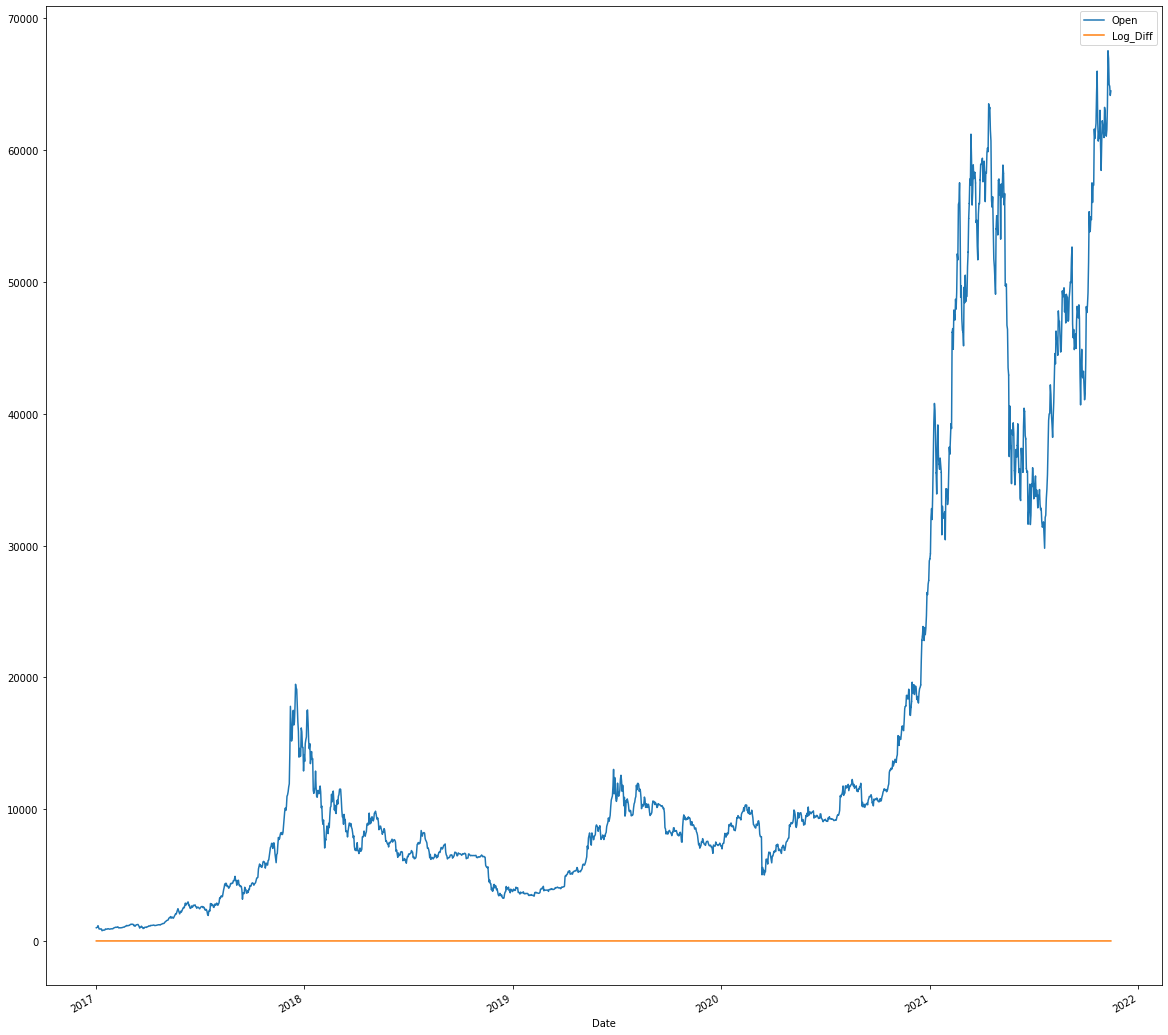

In [58]:
ax = dataset.plot()

In [10]:
data.set_index('Date', inplace = True)

In [11]:
print(data.index)

DatetimeIndex(['2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-10-29',
               ...
               '2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14',
               '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18',
               '2021-11-19', '2021-11-20'],
              dtype='datetime64[ns]', name='Date', length=397, freq=None)


## Застосуємо модель seasonal_decompose щоб побачити частини нашого ряду (тренд, сезонність і залишок)

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
result_add = seasonal_decompose(dataset.Open, model='additive', extrapolate_trend='freq')

#some data to research the correlation
trend = result_add.trend
seasonal = result_add.seasonal
residual = result_add.resid

plt.rcParams.update({'figure.figsize': (20,20)})
result_add.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

## Plot moving average

In [61]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series, label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

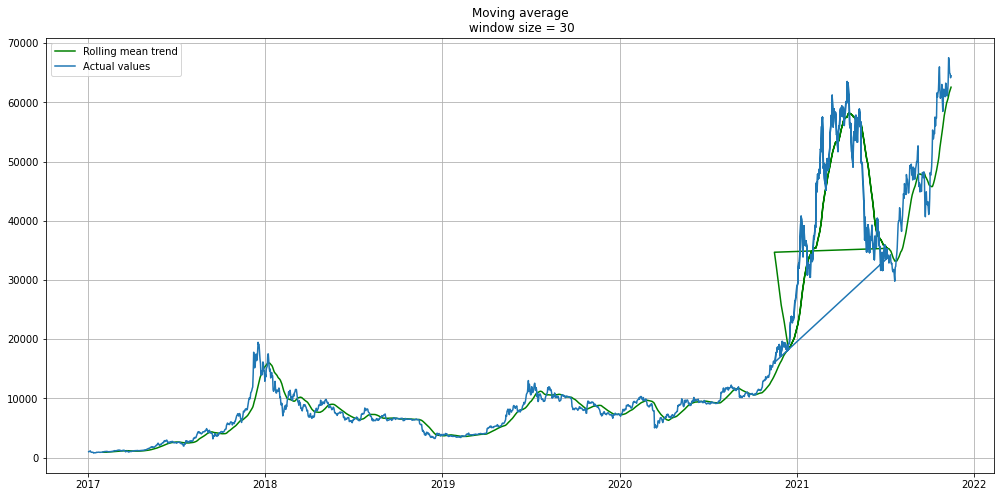

In [62]:
plot_moving_average(dataset.Open, 30)

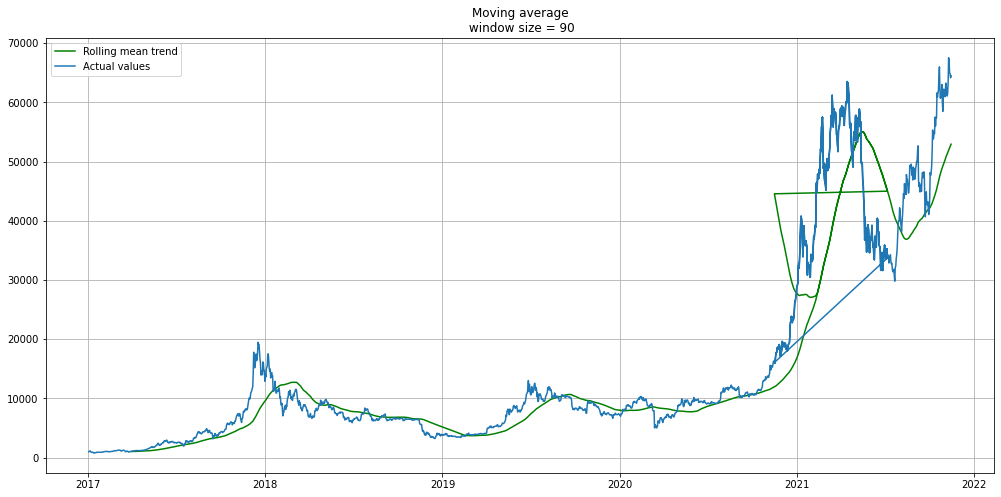

In [63]:
plot_moving_average(dataset.Open, 90)

c:\users\orest\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\users\orest\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


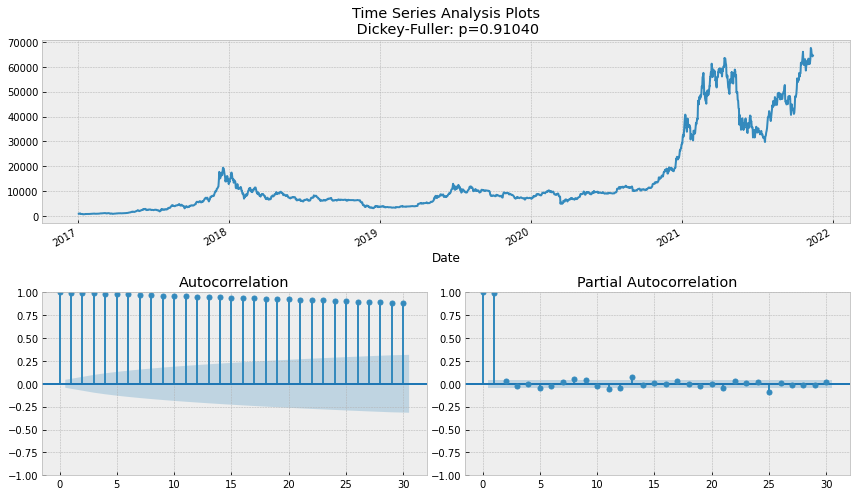

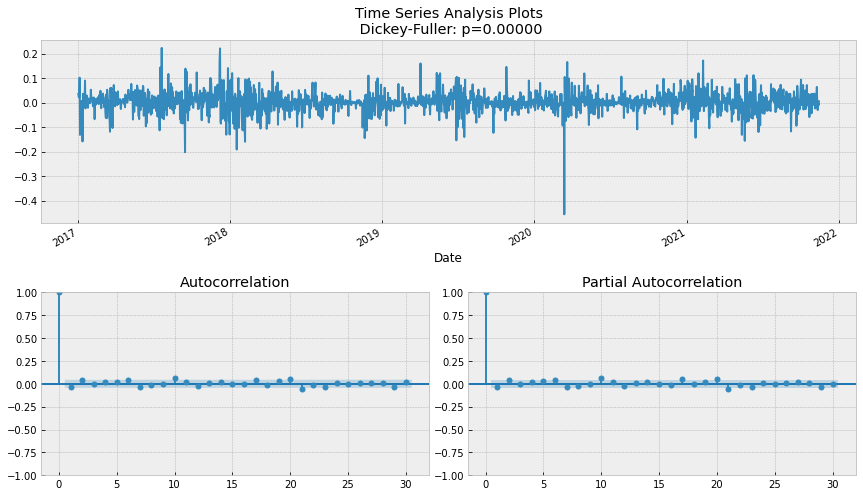

In [64]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(dataset.Open, lags=30)

# Take the first difference to remove to make the process stationary


tsplot(dataset['Log_Diff'], lags=30)

In [66]:
!pip install tqdm

In [ ]:
from itertools import product
from tqdm import tqdm_notebook
import warnings

warnings.filterwarnings('ignore')

#Set initial values and some bounds
ps = range(0, 2)
d = 1
qs = range(0, 2)
Ps = range(0, 2)
D = 1
Qs = range(0, 2)
s = int(365/7)

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    '''
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    '''
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(dataset['Log_Diff'], order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(dataset['Log_Diff'], order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())

  0%|          | 0/16 [00:00<?, ?it/s]

In [25]:
prediction = best_model.forecast(365)

In [26]:
prediction

2021-11-21     58550.194918
2021-11-22     59410.161632
2021-11-23     60344.877901
2021-11-24     60063.022201
2021-11-25     60196.085247
                  ...      
2022-11-16    105775.059111
2022-11-17    105900.770760
2022-11-18    105481.112912
2022-11-19    104914.427446
2022-11-20    105327.434863
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

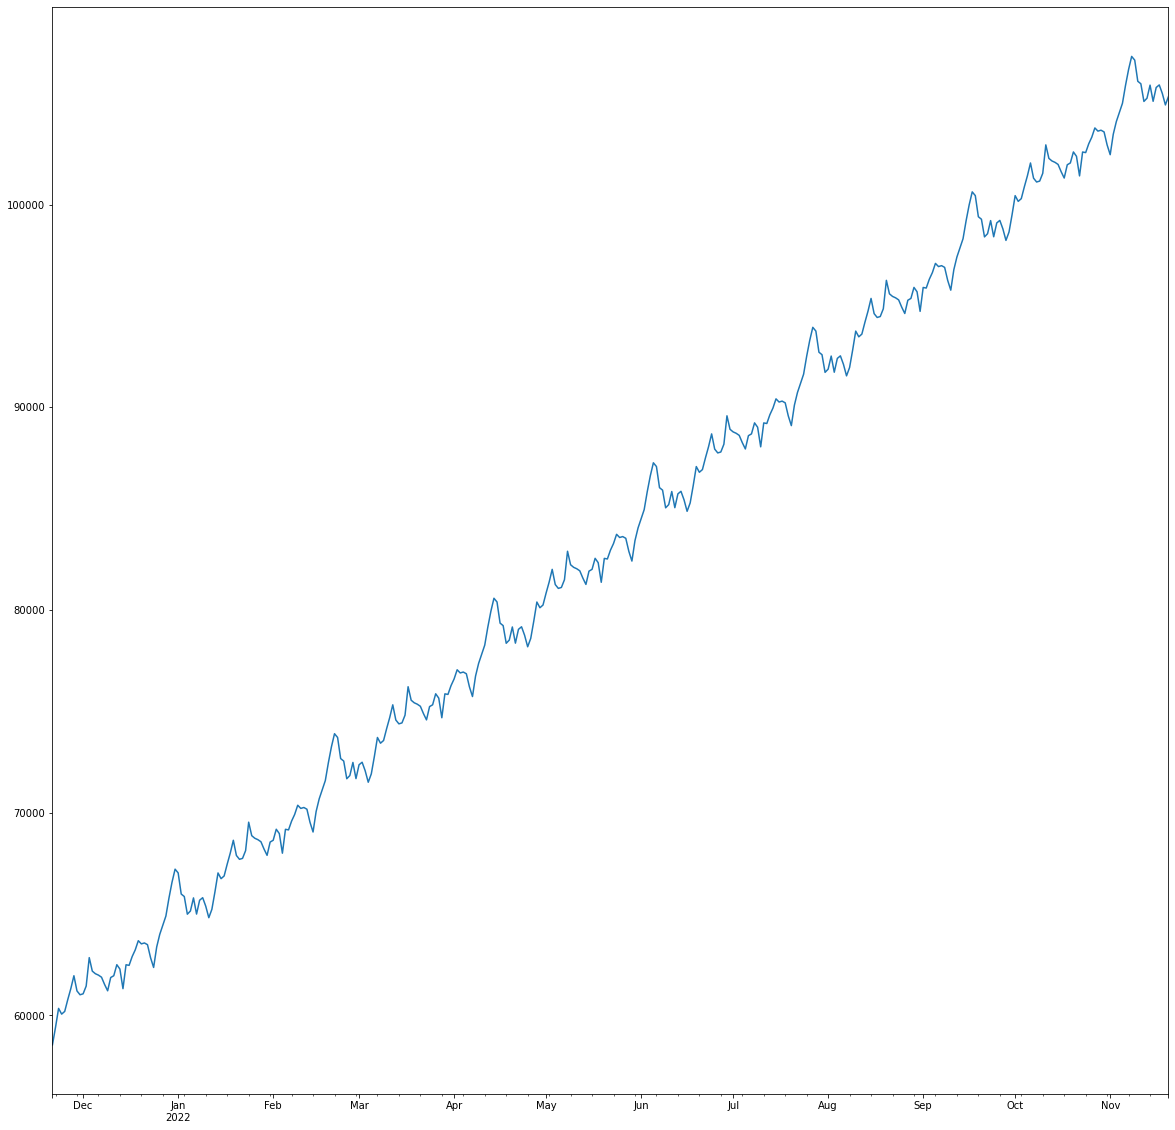

In [27]:
prediction_plot = prediction.plot()